In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [20]:
# Outliers --> Extreme Values are Known as outliers
salary = [11, 40, 45, 68, 65, 68, 78, 90, 57, 74, 91, 92, 88, 68, 57, 48, 99, 101, 68, 77, 110, 140]
df=pd.DataFrame(salary, columns=['salary'])
df

,salary
0,11
1,40
2,45
3,68
4,65
5,68
6,78
7,90
8,57
9,74


In [4]:
df.describe()

,0
count,22.000000
mean,74.318182
std,27.201867
min,11.000000
25%,59.000000
50%,71.000000
75%,90.750000
max,140.000000


Text(0.5, 1.0, 'The Box Plot')

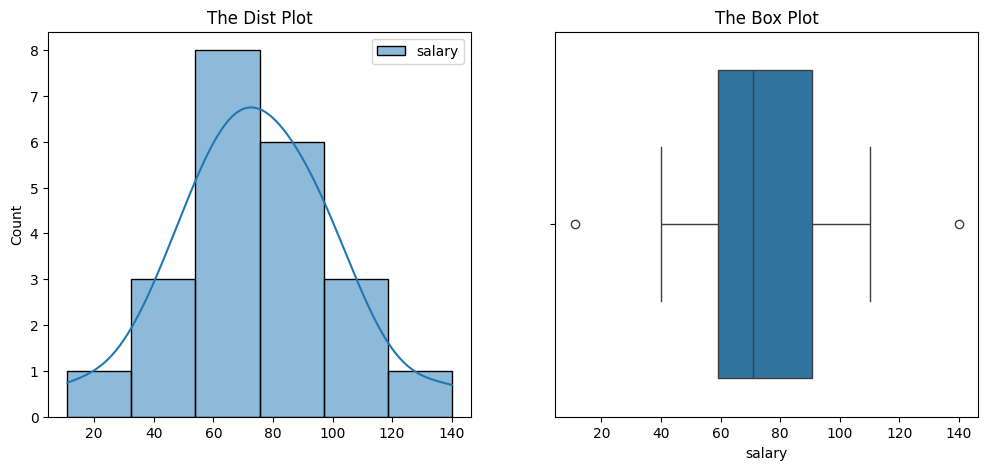

In [21]:
# To check outliers we use Distribution Plot and Hist plot
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df,kde=True)
plt.title("The Dist Plot")

plt.subplot(1,2,2)
sns.boxplot(data=df,x='salary')
plt.title("The Box Plot")

    salary
1       40
2       45
3       68
4       65
5       68
6       78
7       90
8       57
9       74
10      91
11      92
12      88
13      68
14      57
15      48
16      99
17     101
18      68
19      77
20     110
21     140


Text(0.5, 1.0, 'The Box Plot')

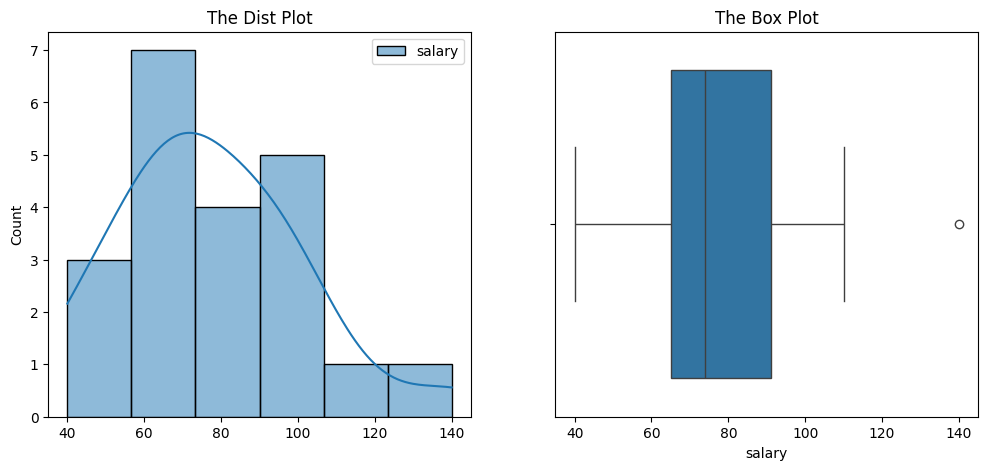

In [ ]:
# Dropping Value
q1=df["salary"].quantile(0.25)
q3=df["salary"].quantile(0.75)

IQR=q3-q1
lower_fence=q1-1.5*IQR
upper_fence=q3+1.5*IQR

df_filtered=df[(df.salary>=lower_fence)&(df.salary<=salary)]
print(df_filtered)
df_filtered.shape

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df_filtered,kde=True)
plt.title("The Dist Plot")

plt.subplot(1,2,2)
sns.boxplot(data=df_filtered,x='salary')
plt.title("The Box Plot")



In [32]:
# replace with mean/median 
df["salary_imputed_mean"]=np.where((df.salary>=upper_fence)|(df.salary<=lower_fence),df["salary"].mean(),df["salary"])
df

,salary,salary_imputed_mean
0,11,74.318182
1,40,40.000000
2,45,45.000000
3,68,68.000000
4,65,65.000000
5,68,68.000000
6,78,78.000000
7,90,90.000000
8,57,57.000000
9,74,74.000000


Text(0.5, 1.0, 'The Box Plot')

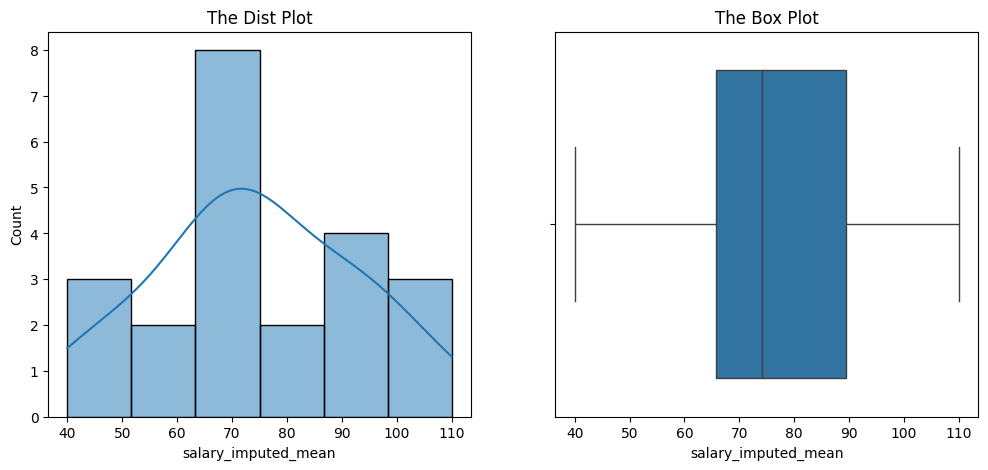

In [33]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df["salary_imputed_mean"],kde=True)
plt.title("The Dist Plot")

plt.subplot(1,2,2)
sns.boxplot(data=df,x='salary_imputed_mean')
plt.title("The Box Plot")

Text(0.5, 1.0, 'The Box Plot')

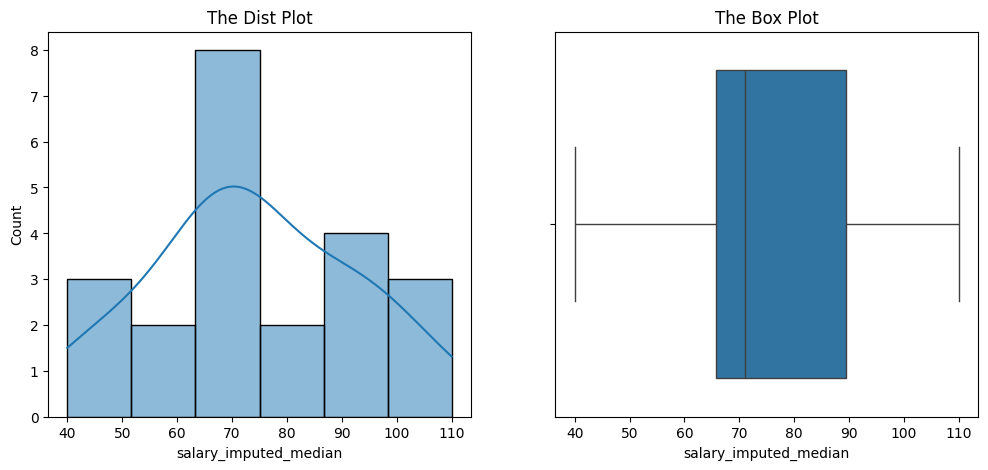

In [35]:
df["salary_imputed_median"]=np.where((df.salary>=upper_fence)|(df.salary<=lower_fence),df["salary"].median(),df["salary"])
df

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df["salary_imputed_median"],kde=True)
plt.title("The Dist Plot")

plt.subplot(1,2,2)
sns.boxplot(data=df,x='salary_imputed_median')
plt.title("The Box Plot")

In [36]:
# Capping the Outlier --> Replacing with the nearest value which is not a outlier
df

,salary,salary_imputed_mean,salary_imputed_median
0,11,74.318182,71.0
1,40,40.000000,40.0
2,45,45.000000,45.0
3,68,68.000000,68.0
4,65,65.000000,65.0
5,68,68.000000,68.0
6,78,78.000000,78.0
7,90,90.000000,90.0
8,57,57.000000,57.0
9,74,74.000000,74.0


In [38]:
lower_cap=df["salary"].quantile(0.05)
upper_cap=df["salary"].quantile(0.95)

print(lower_cap)
print(upper_cap)

40.25
109.55


In [56]:
# replace with outlier cap
df["salary_Capped"]=np.where(df["salary"]<=lower_cap,lower_cap,np.where(df["salary"]>=upper_cap,upper_cap,df["salary"]))
df

,salary,salary_imputed_mean,salary_imputed_median,salary_Capped
0,11,74.318182,71.0,40.25
1,40,40.000000,40.0,40.25
2,45,45.000000,45.0,45.00
3,68,68.000000,68.0,68.00
4,65,65.000000,65.0,65.00
5,68,68.000000,68.0,68.00
6,78,78.000000,78.0,78.00
7,90,90.000000,90.0,90.00
8,57,57.000000,57.0,57.00
9,74,74.000000,74.0,74.00


Text(0.5, 1.0, 'The Box Plot')

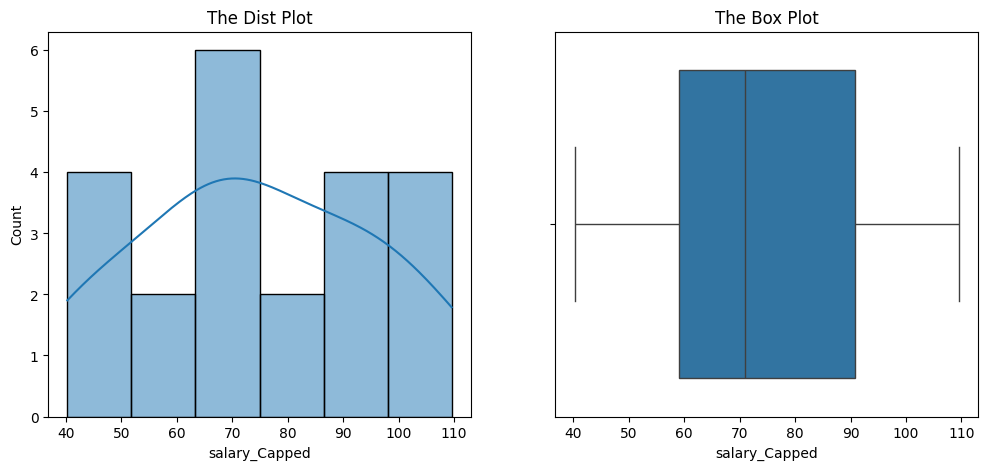

In [57]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df["salary_Capped"],kde=True)
plt.title("The Dist Plot")

plt.subplot(1,2,2)
sns.boxplot(data=df,x='salary_Capped')
plt.title("The Box Plot")